In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
dt = DecisionTreeClassifier()

In [3]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [4]:
import pandas as pd
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
feature_target = oe.fit_transform(tennis_data)

In [6]:
data = pd.DataFrame(feature_target, columns=['outlook','temp','humidity','windy','play'], dtype='int')

In [8]:
dt = DecisionTreeClassifier(max_depth=3)

In [9]:
dt.fit(data.drop(columns=['play']), data.play)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(dt,'dt-depth3.tree',feature_names=['outlook','temp','humidity','windy'])

<img src="https://camo.githubusercontent.com/b039a322de73baedfdb657e89a76dde8b17af558/68747470733a2f2f6769746875622e636f6d2f6177616e74696b2f6d616368696e652d6c6561726e696e672d736c696465732f626c6f622f6d61737465722f62762e504e473f7261773d74727565">

### Bias Variance Tardeoff
* High Bias - Bad accuracy for training data as well testing data
* Low Bias - Good accuracy
* High Variance - Gap between training error & testing error is high. Generally complex models have high variance.
  Examples are - very small k in NearestNeighbours, max_depth very high or None in case of Decision Tree

In [13]:
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
### Identify the best value of max_depth (bias-variance tradeoff)

In [17]:
trainX, testX, trainY, testY = train_test_split(iris.data, iris.target)

In [20]:
training_accuracy = []
testing_accuracy = []
for depth in [2,4,6,8,10,None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(trainX, trainY)
    training_accuracy.append(dt.score(trainX,trainY))
    testing_accuracy.append(dt.score(testX,testY))

In [23]:
training = pd.Series(data=training_accuracy, index=[2,4,6,8,10,'all'])

In [24]:
testing = pd.Series(data=testing_accuracy, index=[2,4,6,8,10,'all'])

In [26]:
df = pd.DataFrame({'Train':training, 'Test':testing})

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

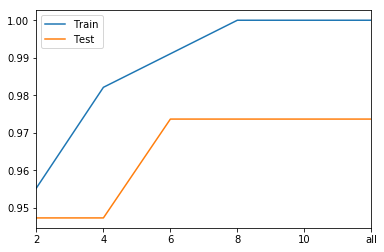

In [28]:
df.plot()

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
training_accuracy = []
testing_accuracy = []
for k in [2,4,6,8,10,15]:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(trainX, trainY)
    training_accuracy.append(knc.score(trainX,trainY))
    testing_accuracy.append(knc.score(testX,testY))

In [32]:
training = pd.Series(data=training_accuracy, index=[2,4,6,8,10,15])
testing = pd.Series(data=testing_accuracy, index=[2,4,6,8,10,15])
df = pd.DataFrame({'Train':training, 'Test':testing})

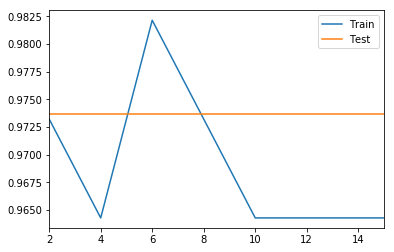

In [33]:
df.plot()

In [34]:
dt.feature_importances_

array([0.        , 0.04665545, 0.39962189, 0.55372266])

* Tells the importances of features
* Q. Important question will be in top of the tree or bottom of the tree
* A. Top
* Q. For Ordinal values, do you need one hot encoding
* A. No

In [35]:
dt.classes_

array([0, 1, 2])

In [37]:
dt.criterion

'gini'

In [38]:
dt.max_features_

4

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
breast_cancer = load_breast_cancer()

In [48]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [49]:
df['target'] = breast_cancer.target

In [51]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121,1
117,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650,0
261,17.350,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,31.47,128.20,1218.0,0.12400,0.14860,0.12110,0.08235,0.2452,0.06515,0
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640,0
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,...,14.10,66.53,342.9,0.12340,0.07204,0.00000,0.00000,0.3105,0.08151,1
450,11.870,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952,1
43,13.280,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270,0
363,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469,1
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,18.16,84.16,516.4,0.14600,0.11150,0.10870,0.07864,0.2765,0.07806,1
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,...,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,1


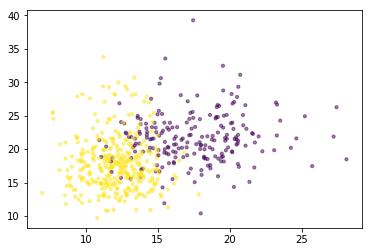

In [54]:
plt.scatter(x=df['mean radius'],y=df['mean texture'],c=df.target,s=10, alpha=.5)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
trainX, testX, trainY, testY = train_test_split(df.drop(columns=['target']), df.target)

In [57]:
dt = DecisionTreeClassifier(max_depth=7)

In [59]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
dt.score(testX,testY)

0.9370629370629371

In [66]:
import numpy as np
res = np.where(dt.feature_importances_ > .005)

In [75]:
breast_cancer.data[:,res[0]].shape

(569, 13)

In [73]:
breast_cancer.data.shape

(569, 30)

In [81]:
dt = DecisionTreeClassifier(max_depth=5)

In [77]:
trainX, testX, trainY, testY = train_test_split(breast_cancer.data[:,res[0]], breast_cancer.target)

In [82]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
dt.score(testX,testY)

0.916083916083916

In [84]:
dt.score(trainX,trainY)

0.9882629107981221